# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [71]:
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt

# Import your own code
from Household import HouseholdSpecializationModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

In [90]:
# a. Load model as the household class
model = HouseholdSpecializationModelClass()

# b. Defining the axis-values and empty H-ratio matrix for optimal solutions
N = 3
alpha_vec = np.linspace(0.25,0.75,N)
sigma_vec = np.linspace(0.5,1.5,N)
H_ratio = np.zeros((N,N))

# c. Looping through alpha and sigma, solve optimal allocation and input into H-raitio matrix
for i, alpha in enumerate(np.linspace(0.25,0.75,3)):
    model.par.alpha = alpha #set alpha value
    
    for j, sigma in enumerate(np.linspace(0.5,1.5,3)):
        model.par.sigma = sigma #set sigma value given the alpha value
        
        opt = model.solve_discrete() #Optimal allocation solution
        HF = opt.HF
        HM = opt.HM
        H_ratio[i,j] = HF/HM #Input H_ratio into matrix

print(H_ratio)

c:\Users\PerLi\projects-2023-jacob-per\inauguralproject\Household.py:64: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**sigma_ + (par.alpha)*HF**sigma_)**((sigma_)**-1)


[[0.54545455 0.30769231 0.21428571]
 [1.         1.         1.        ]
 [1.83333333 3.25       4.66666667]]


Plotting the figure in 3d

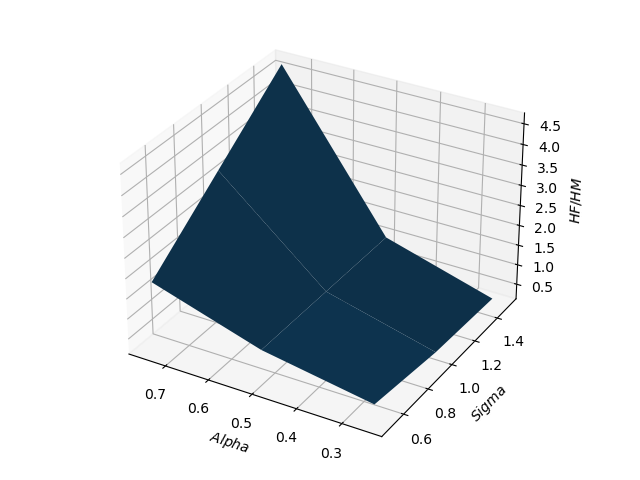

In [109]:
from matplotlib import cm # for colormaps
%matplotlib widget

# a. actual plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(alpha_mesh,sigma_mesh,H_ratio)

# b. add labels
ax.set_xlabel('$Alpha$') # Notice latex syntax
ax.set_ylabel('$Sigma$')
ax.set_zlabel('$HF/HM$')

# c. invert xaxis to bring Origin in center front
ax.invert_xaxis()

# ax.invert_yaxis()
fig.tight_layout()


# Question 2

Explain your code and procedure

In [24]:
# code

# Question 3

Explain your code and procedure

In [25]:
# code

ADD CONCISE CONLUSION.